# **Transform Patient Lab and Diagnoses Data into Model Inputs**
____

In [1]:
import pandas as pd
import missingno as msno

In [2]:
data = pd.read_csv("diagnoses_lab.csv")
print(data.shape)
data.head()

(199585, 18)


C:\Users\khngu\AppData\Local\Temp\ipykernel_38188\1406064222.py:1: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("diagnoses_lab.csv")


,Unnamed: 0,SUBJECT_ID,HADM_ID,ITEMID,CHARTTIME,VALUE,VALUENUM,FLAG,LABEL,normalized_valuenum,rolling_mean,rolling_std,max_value,min_value,change_from_baseline,month,ICD9_CODE,SHORT_TITLE
0,0,61,176332.0,50862,2118-06-17 12:30:00,3.3,3.3,abnormal,Albumin,0.400000,0.400000,NaN,0.4,0.400000,0.000000,2118-06,20280,Oth lymp unsp xtrndl org
1,1,61,176332.0,50862,2118-06-17 12:30:00,3.3,3.3,abnormal,Albumin,0.400000,0.400000,NaN,0.4,0.400000,0.000000,2118-06,20280,Oth lymp unsp xtrndl org
2,2,61,176332.0,50863,2118-06-17 12:30:00,124.0,124.0,abnormal,Alkaline Phosphatase,0.026411,0.213206,0.264167,0.4,0.026411,-0.373589,2118-06,20280,Oth lymp unsp xtrndl org
3,3,61,176332.0,50863,2118-06-17 12:30:00,124.0,124.0,abnormal,Alkaline Phosphatase,0.026411,0.213206,0.264167,0.4,0.026411,-0.373589,2118-06,20280,Oth lymp unsp xtrndl org
4,4,61,176332.0,50882,2118-06-17 12:30:00,23.0,23.0,NaN,Bicarbonate,0.238636,0.221682,0.187371,0.4,0.026411,-0.161364,2118-06,20280,Oth lymp unsp xtrndl org


### **Use `missingno` to understand sparsity of main dataset**

<Axes: >

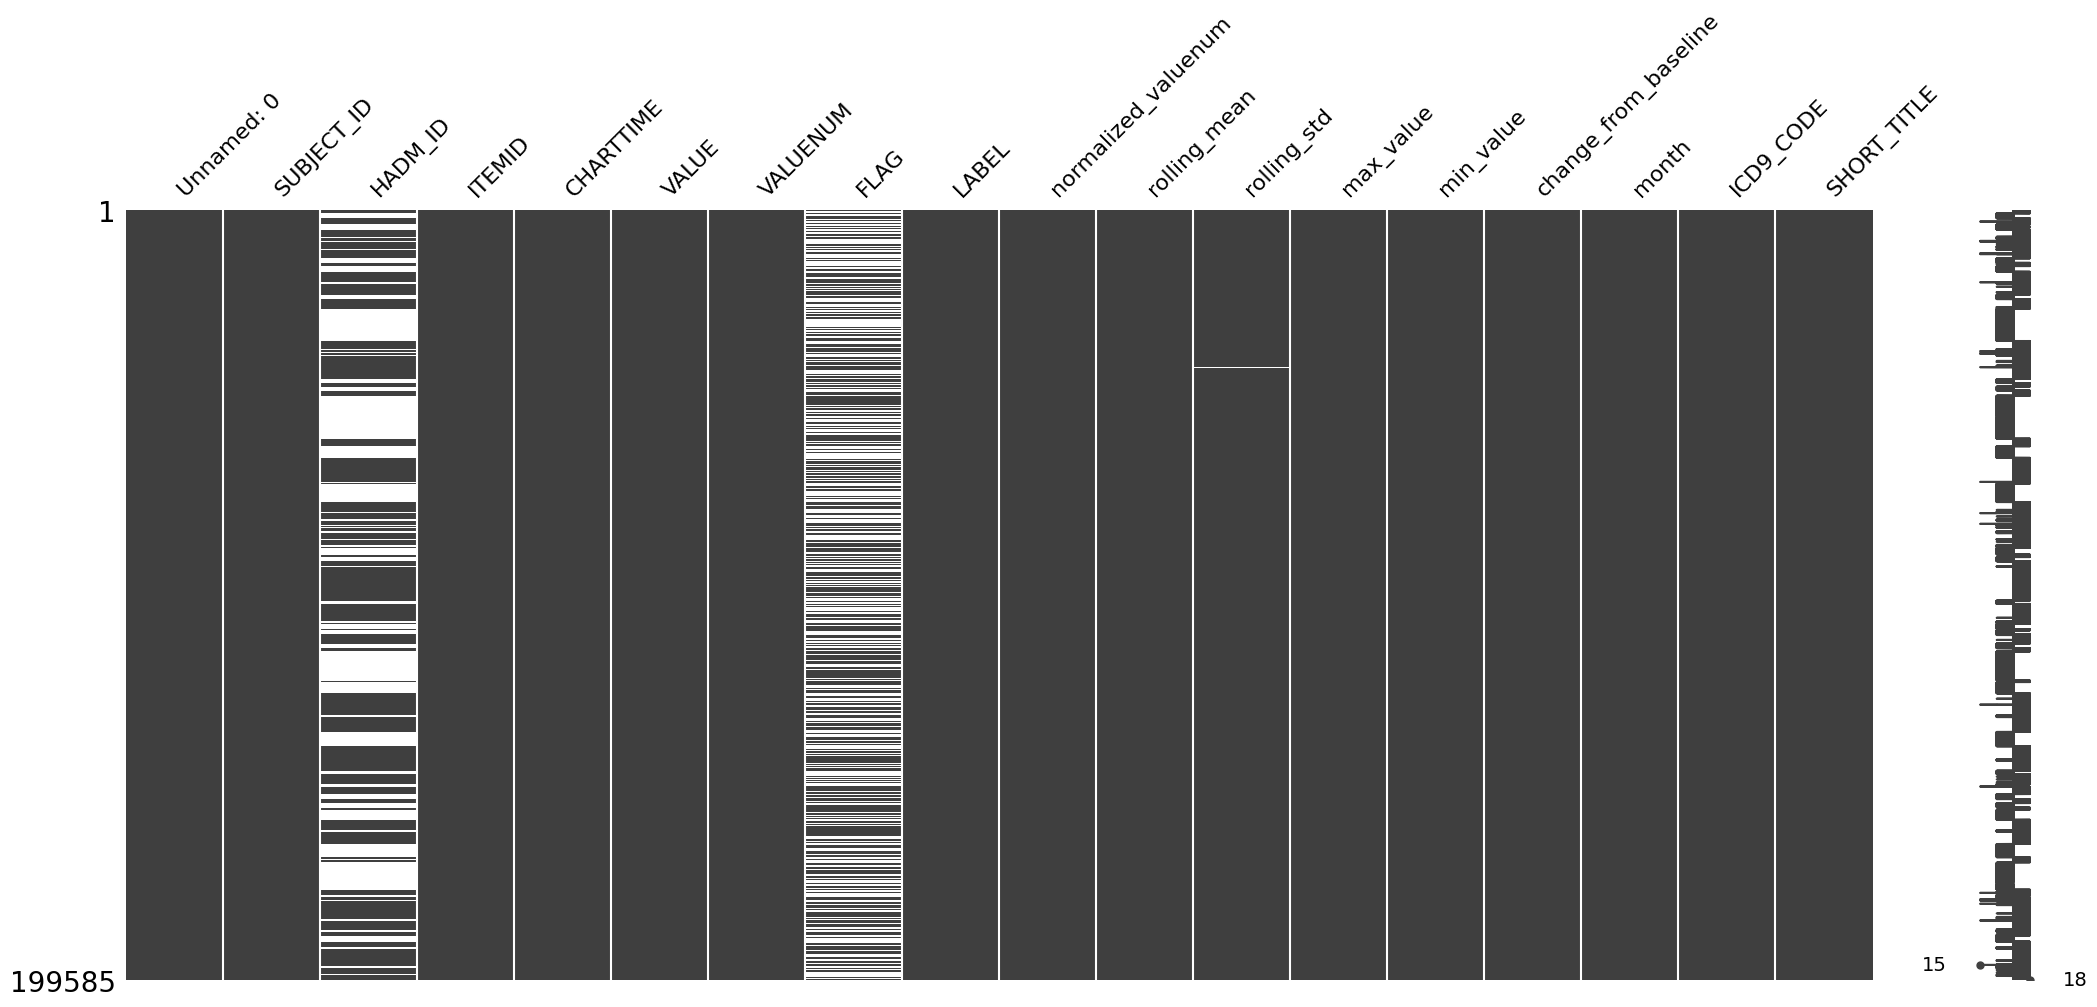

In [3]:
msno.matrix(data)

### **Query data to examine lab test results for each patient**

In [4]:
pivoted_data = data.pivot_table(index=['SUBJECT_ID', 'CHARTTIME'], columns='LABEL', values='normalized_valuenum', aggfunc='first')

In [5]:
print(pivoted_data.shape)
pivoted_data

(8473, 15)


LABEL                            Albumin  Alkaline Phosphatase  Bicarbonate  \
SUBJECT_ID CHARTTIME                                                          
61         2118-06-17 12:30:00  0.400000              0.026411     0.238636   
           2118-06-18 00:30:00  0.316667                   NaN     0.250000   
           2118-06-18 23:00:00  0.333333                   NaN     0.238636   
           2118-06-19 10:41:00       NaN                   NaN          NaN   
           2118-06-19 23:00:00  0.350000              0.022790     0.272727   
...                                  ...                   ...          ...   
99213      2132-09-16 05:07:00       NaN              0.017465     0.261364   
           2132-09-17 07:28:00       NaN                   NaN     0.238636   
           2132-09-18 07:50:00       NaN                   NaN     0.272727   
           2132-09-19 05:04:00       NaN                   NaN     0.261364   
           2132-09-21 09:26:00       NaN                   NaN     0.272727   

LABEL                           Chloride  Creatinine   Glucose  Hematocrit  \
SUBJECT_ID CHARTTIME                                                         
61         2118-06-17 12:30:00  0.639098    0.000495  0.029173    0.433719   
           2118-06-18 00:30:00  0.654135    0.000495  0.027209    0.379665   
           2118-06-18 23:00:00  0.654135    0.000371  0.026648    0.374517   
           2118-06-19 10:41:00       NaN         NaN       NaN         NaN   
           2118-06-19 23:00:00  0.639098    0.000371  0.026367    0.395109   
...                                  ...         ...       ...         ...   
99213      2132-09-16 05:07:00  0.631579    0.000866  0.028050    0.364221   
           2132-09-17 07:28:00  0.624060    0.000866  0.027209    0.368082   
           2132-09-18 07:50:00  0.631579    0.000866  0.031978    0.350064   
           2132-09-19 05:04:00  0.631579    0.000743  0.027209    0.353925   
           2132-09-21 09:26:00  0.624060    0.000866  0.033100    0.377091   

LABEL                           Hemoglobin  Platelet Count  Potassium  RBC  \
SUBJECT_ID CHARTTIME                                                         
61         2118-06-17 12:30:00    0.435294        0.114889   0.142322  NaN   
           2118-06-18 00:30:00    0.384314        0.109556   0.097378  NaN   
           2118-06-18 23:00:00    0.380392        0.087556   0.134831  NaN   
           2118-06-19 10:41:00         NaN             NaN        NaN  0.0   
           2118-06-19 23:00:00    0.400000        0.088444   0.134831  NaN   
...                                    ...             ...        ...  ...   
99213      2132-09-16 05:07:00    0.364706        0.164444   0.116105  NaN   
           2132-09-17 07:28:00    0.368627        0.168000   0.131086  NaN   
           2132-09-18 07:50:00    0.349020        0.129111   0.134831  NaN   
           2132-09-19 05:04:00    0.345098        0.139111   0.131086  NaN   
           2132-09-21 09:26:00    0.376471        0.148444   0.134831  NaN   

LABEL                             Sodium  Urea Nitrogen  Vitamin B12  WBC  
SUBJECT_ID CHARTTIME                                                       
61         2118-06-17 12:30:00  0.681818       0.048276          NaN  NaN  
           2118-06-18 00:30:00  0.675325       0.031034          NaN  NaN  
           2118-06-18 23:00:00  0.675325       0.017241          NaN  NaN  
           2118-06-19 10:41:00       NaN            NaN          NaN  0.0  
           2118-06-19 23:00:00  0.681818       0.027586          NaN  NaN  
...                                  ...            ...          ...  ...  
99213      2132-09-16 05:07:00  0.675325       0.027586          NaN  NaN  
           2132-09-17 07:28:00  0.655844       0.037931          NaN  NaN  
           2132-09-18 07:50:00  0.655844       0.031034          NaN  NaN  
           2132-09-19 05:04:00  0.655844       0.027586          NaN  NaN  
           2132-09-21 09:26:00

### Note that the data is quite sparse, so we will perform:
### **Last Observation Carried Forward (LOCF)**

<Axes: >

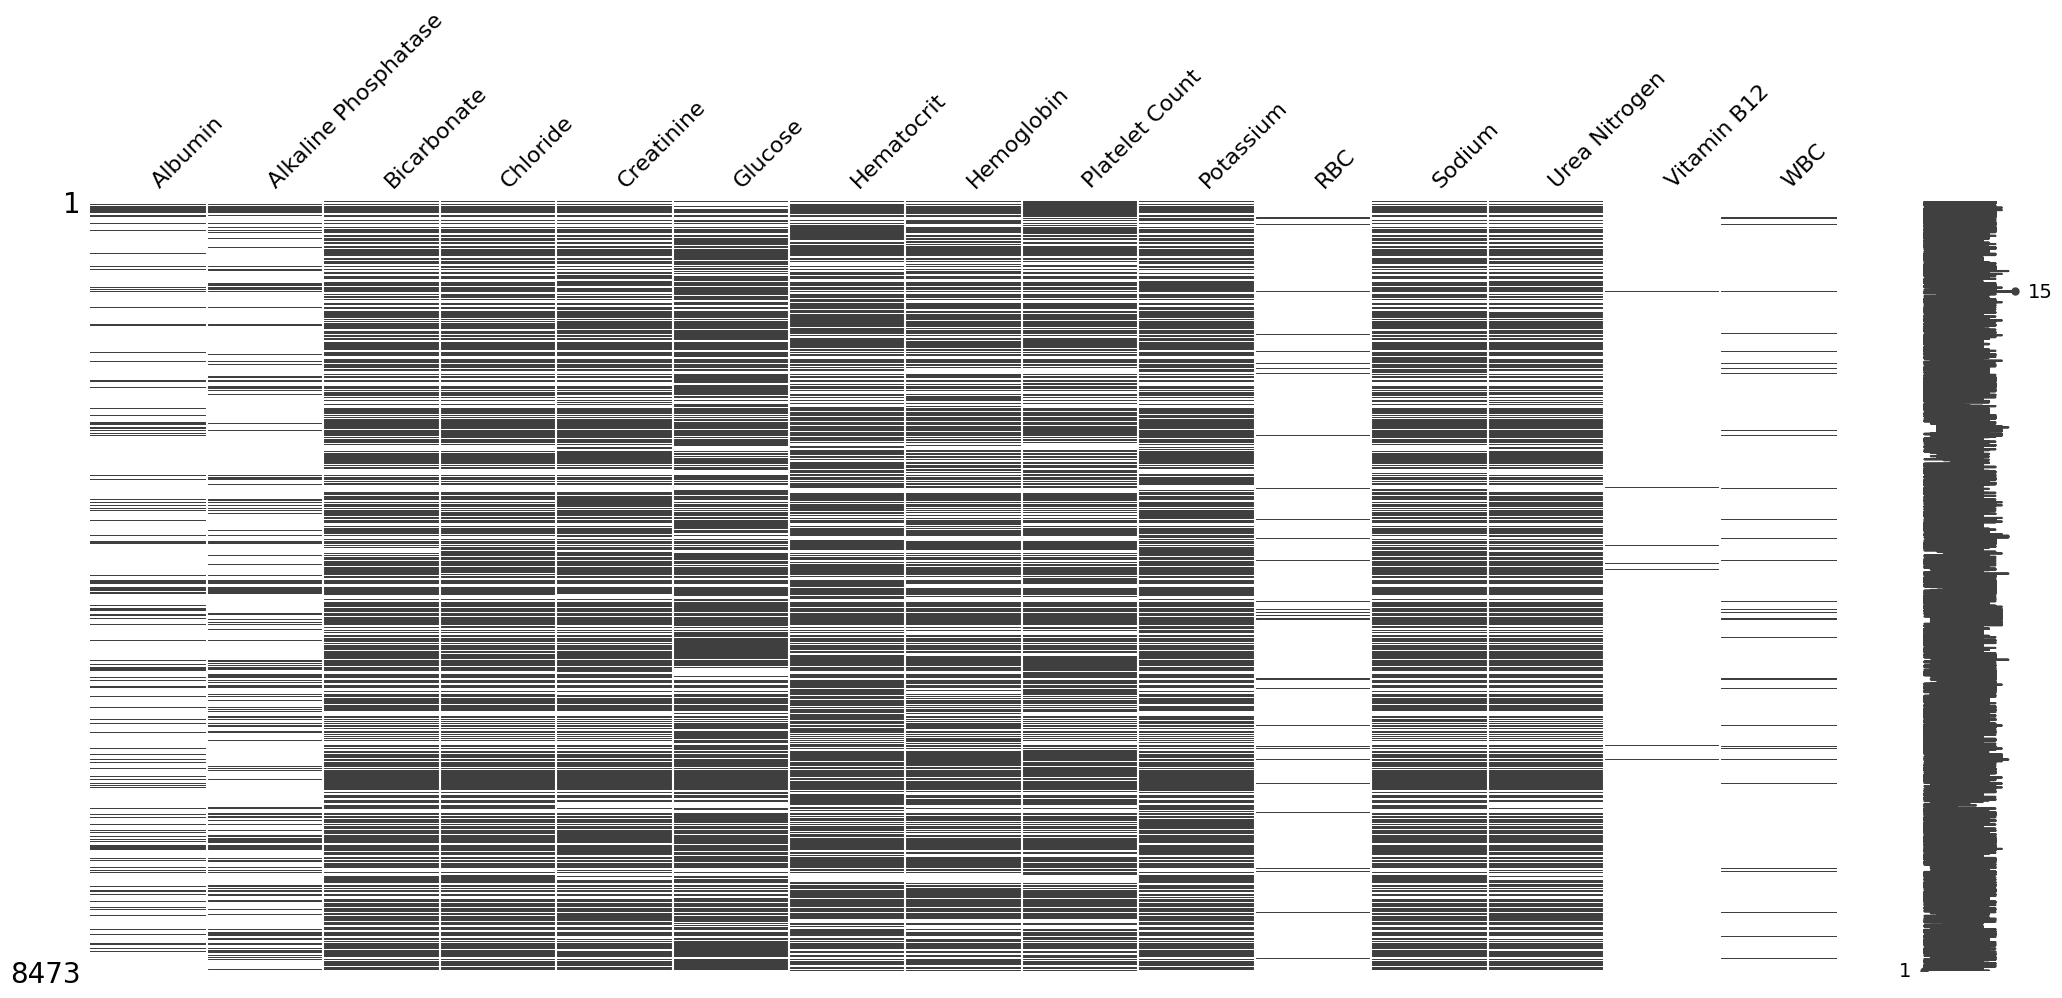

In [6]:
msno.matrix(pivoted_data)

<Axes: >

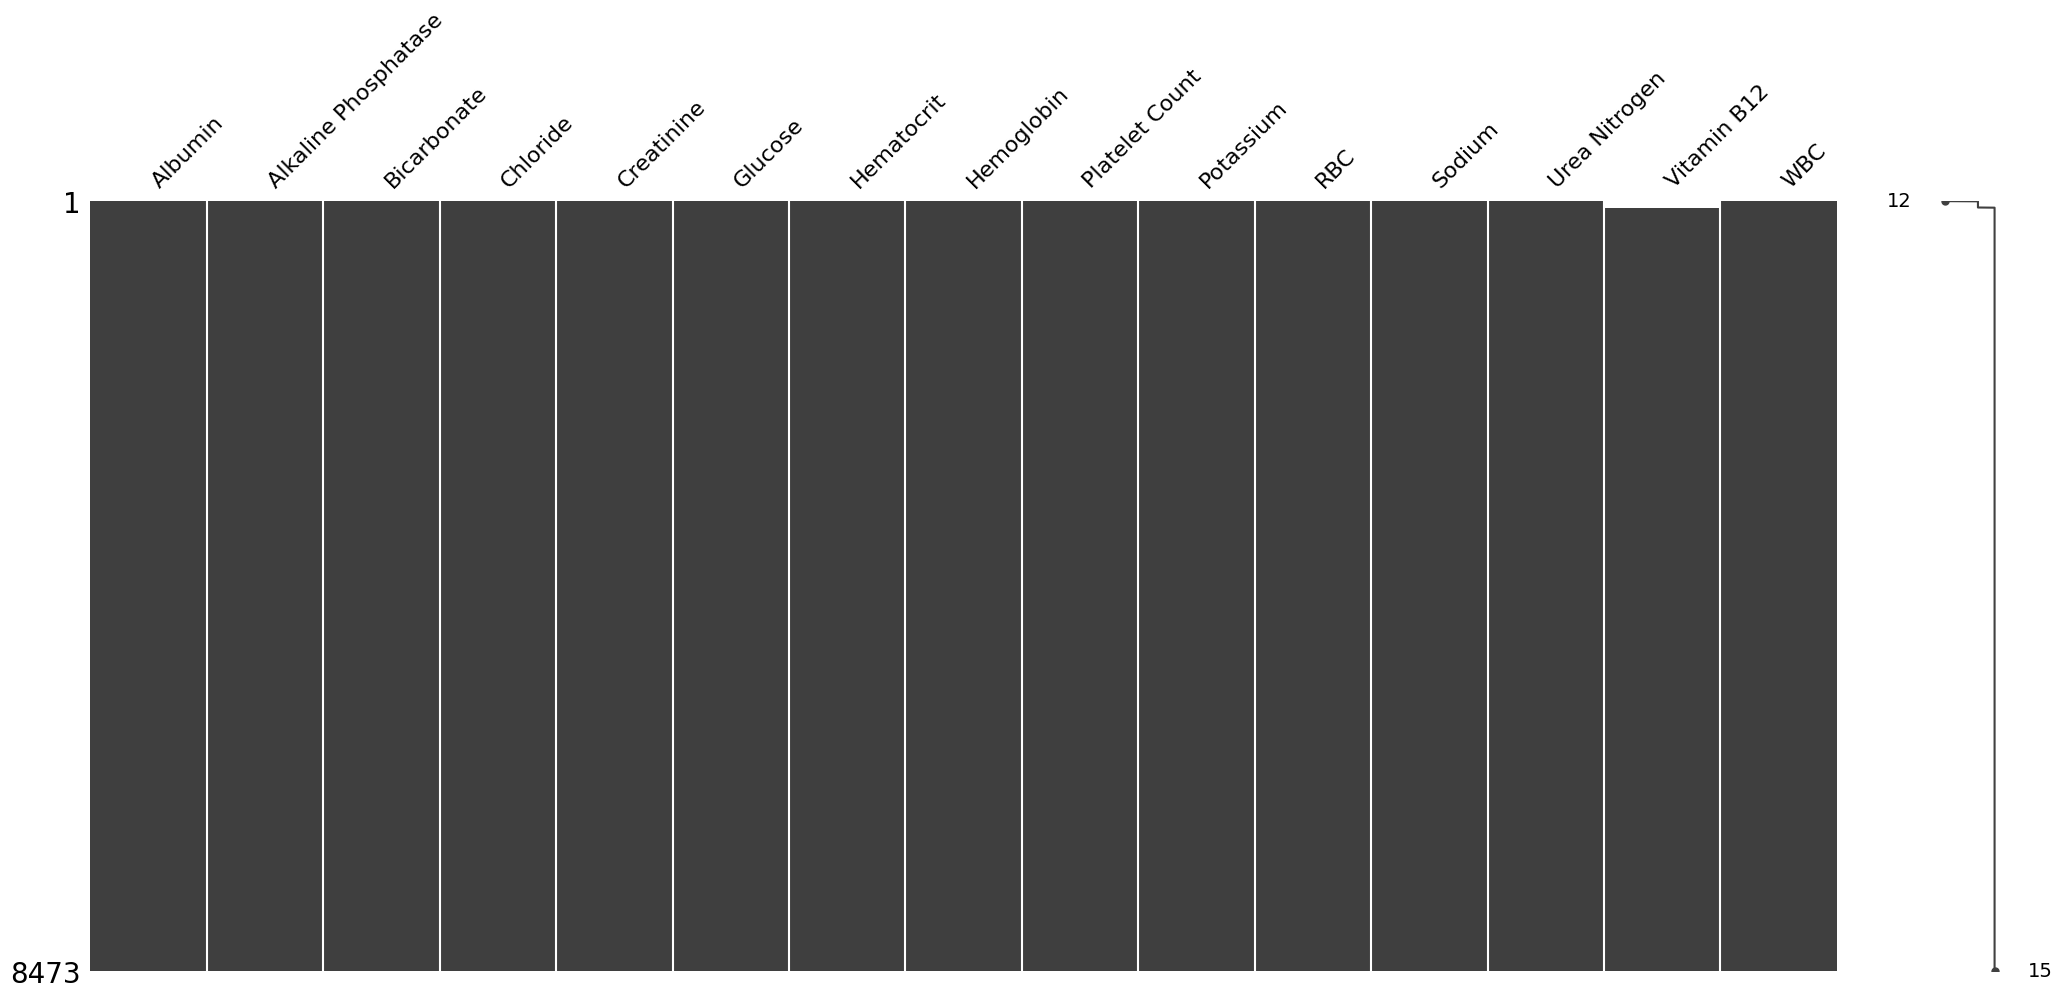

In [7]:
# Forward fill to propagate last valid observation forward to next valid
pivoted_data.ffill(axis=0, inplace=True)
msno.matrix(pivoted_data)

### Compute the additional features like in the previous notebook

In [8]:
window_size = 5  # A chosen window size, could be adjusted based on specific needs
for column in pivoted_data.columns:
    pivoted_data[f'{column}_rolling_mean'] = pivoted_data[column].rolling(window=window_size).mean()
    pivoted_data[f'{column}_rolling_std']  = pivoted_data[column].rolling(window=window_size).std()
    pivoted_data[f'{column}_max_value']    = pivoted_data[column].rolling(window=window_size).max()
    pivoted_data[f'{column}_min_value']    = pivoted_data[column].rolling(window=window_size).min()
    pivoted_data[f'{column}_change_from_baseline'] = pivoted_data[column] - pivoted_data[column].iloc[0]

<Axes: >

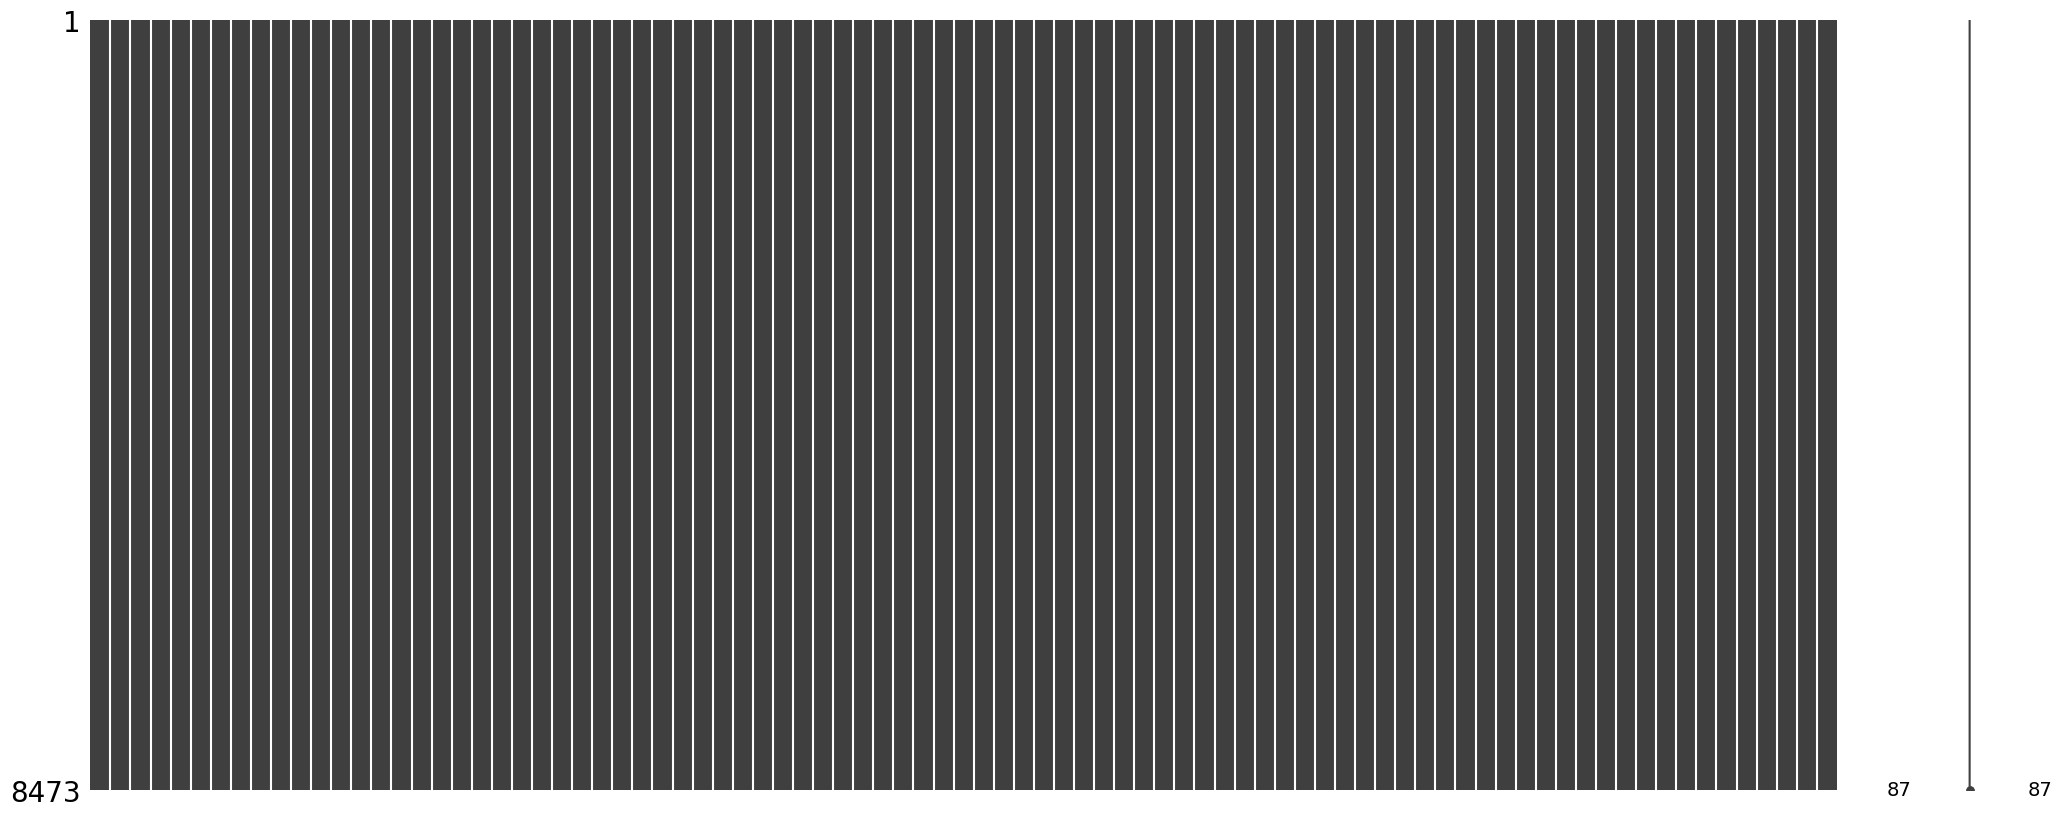

In [9]:
# Optionally, backward fill to ensure that all missing data are filled
pivoted_data.bfill(axis=0, inplace=True)

pivoted_data = pivoted_data.dropna(axis=1)

msno.matrix(pivoted_data)

In [10]:
pivoted_data.describe()

LABEL,Albumin,Alkaline Phosphatase,Bicarbonate,Chloride,Creatinine,Glucose,Hematocrit,Hemoglobin,Platelet Count,Potassium,...,Urea Nitrogen_min_value,Urea Nitrogen_change_from_baseline,Vitamin B12_rolling_mean,Vitamin B12_rolling_std,Vitamin B12_max_value,Vitamin B12_min_value,WBC_rolling_mean,WBC_rolling_std,WBC_max_value,WBC_min_value
count,8473.000000,8473.000000,8473.000000,8473.000000,8473.000000,8473.000000,8473.000000,8473.000000,8473.000000,8473.000000,...,8473.000000,8473.000000,8473.000000,8473.000000,8473.000000,8473.000000,8473.000000,8473.000000,8473.000000,8473.000000
mean,0.392704,0.031197,0.261696,0.612947,0.002024,0.046988,0.402885,0.392737,0.044842,0.129178,...,0.099942,0.068224,0.348493,0.002251,0.350773,0.346232,0.009140,0.001704,0.011010,0.007487
std,0.129865,0.044714,0.058721,0.042997,0.002690,0.049636,0.071284,0.104969,0.031110,0.025803,...,0.079365,0.086251,0.180368,0.015828,0.180939,0.180983,0.031763,0.015297,0.042172,0.026886
min,0.066667,0.002556,0.045455,0.458647,0.000248,0.000000,0.154440,0.039231,0.000444,0.033708,...,0.013793,-0.034483,0.077949,0.000000,0.077949,0.077949,0.000000,0.000000,0.000000,0.000000
25%,0.300000,0.015335,0.227273,0.586466,0.000990,0.028050,0.351351,0.352941,0.023111,0.112360,...,0.048276,0.006897,0.200513,0.000000,0.200513,0.200513,0.000000,0.000000,0.000000,0.000000
50%,0.400000,0.021512,0.261364,0.609023,0.001361,0.033941,0.395109,0.396078,0.040444,0.127341,...,0.075862,0.041379,0.282564,0.000000,0.282564,0.282564,0.001000,0.000000,0.002000,0.001000
75%,0.500000,0.032162,0.295455,0.639098,0.002228,0.046283,0.444015,0.450980,0.060222,0.142322,...,0.120690,0.096552,0.427692,0.000000,0.427692,0.427692,0.006000,0.000000,0.008000,0.005000
max,0.766667,0.649840,0.545455,0.827068,0.170792,1.000000,0.779923,0.831373,0.336667,0.520599,...,0.627586,0.651724,0.804615,0.295419,0.804615,0.804615,0.567400,0.364236,0.667000,0.539000


### **Data is now model-ready** and so we save it

In [11]:
pivoted_data.to_csv('pt_lab_interp.csv')